In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from project_catalog.galactic_binary import GalacticBinary
from project_catalog import compute_1d_hdrs, compute_8d_hdr
from project_catalog.utils import get_galactic_binary_names

%load_ext autoreload
%autoreload 2

### Get names of each source from filenames

In [ ]:
names = get_galactic_binary_names()

### Create a `GalacticBinary` object from one of the filenames
* This will load in data for candidate injections and the posterior samples

In [ ]:
gb = GalacticBinary.load_feather(names[2])

* Use `gb.subset_candidates` and `gb.subset_samples` to get the galactic binary parameters only
* Otherwise, you'll have all the parameters (including `Name`, `SNR`, and so on)

In [72]:
gb.subset_candidates()

,Frequency,Amplitude,Inclination,Initial Phase,Ecliptic Latitude,Ecliptic Longitude,Polarization,Frequency Derivative
0,0.003013,8.447566e-24,0.164798,4.018830,0.215624,4.808957,0.562478,3.339777e-17
1,0.003013,2.915831e-23,1.907287,2.477918,-0.100243,4.625133,0.598564,6.454475e-17
2,0.003013,1.281852e-23,1.073205,5.445556,0.045420,4.735553,1.534270,3.175113e-17


In [73]:
gb.candidates

,Name,Amplitude,Ecliptic Latitude,Ecliptic Longitude,Frequency,Frequency Derivative,Inclination,Initial Phase,Polarization,SNR,Detached
0,19763412.0,8.447566e-24,0.215624,4.808957,0.003013,3.339777e-17,0.164798,4.018830,5.720707,10.124382,1
1,18673125.0,2.915831e-23,-0.100243,4.625133,0.003013,6.454475e-17,1.907287,2.477918,5.684622,26.663445,1
2,13789765.0,1.281852e-23,0.045420,4.735553,0.003013,3.175113e-17,1.073205,5.445556,1.534270,7.128704,1


In [ ]:
hdr_df = pd.read_feather("../data/hdrs.feather")

In [ ]:
def plot_bad_hdrs(bad_hdr_index, hdr_threshold, hdr_df):
    hdr_threshold = 0.9

    bad_hdrs = hdr_df[hdr_df["8D HDR"] >= hdr_threshold]
    gb = GalacticBinary.load_feather(bad_hdrs.iloc[bad_hdr_index]["Name"])

    # get the candidate that is associated with this particular entry
    candidate_name = bad_hdrs.iloc[bad_hdr_index]["Candidate"]
    candidate_index = gb.candidates[gb.candidates["Name"] == candidate_name].index[0]

    if (candidate_name - gb.candidates.iloc[candidate_index]["Name"] != 0):
        # check that the candidate is correct
        # this shouldn't happen
        raise ValueError("Candidate name does not match the one in the gb.candidates dataframe")

    gb.corner_plot(candidate_index)


Loaded LDC0024787731 with 2503 samples and 1 candidates.


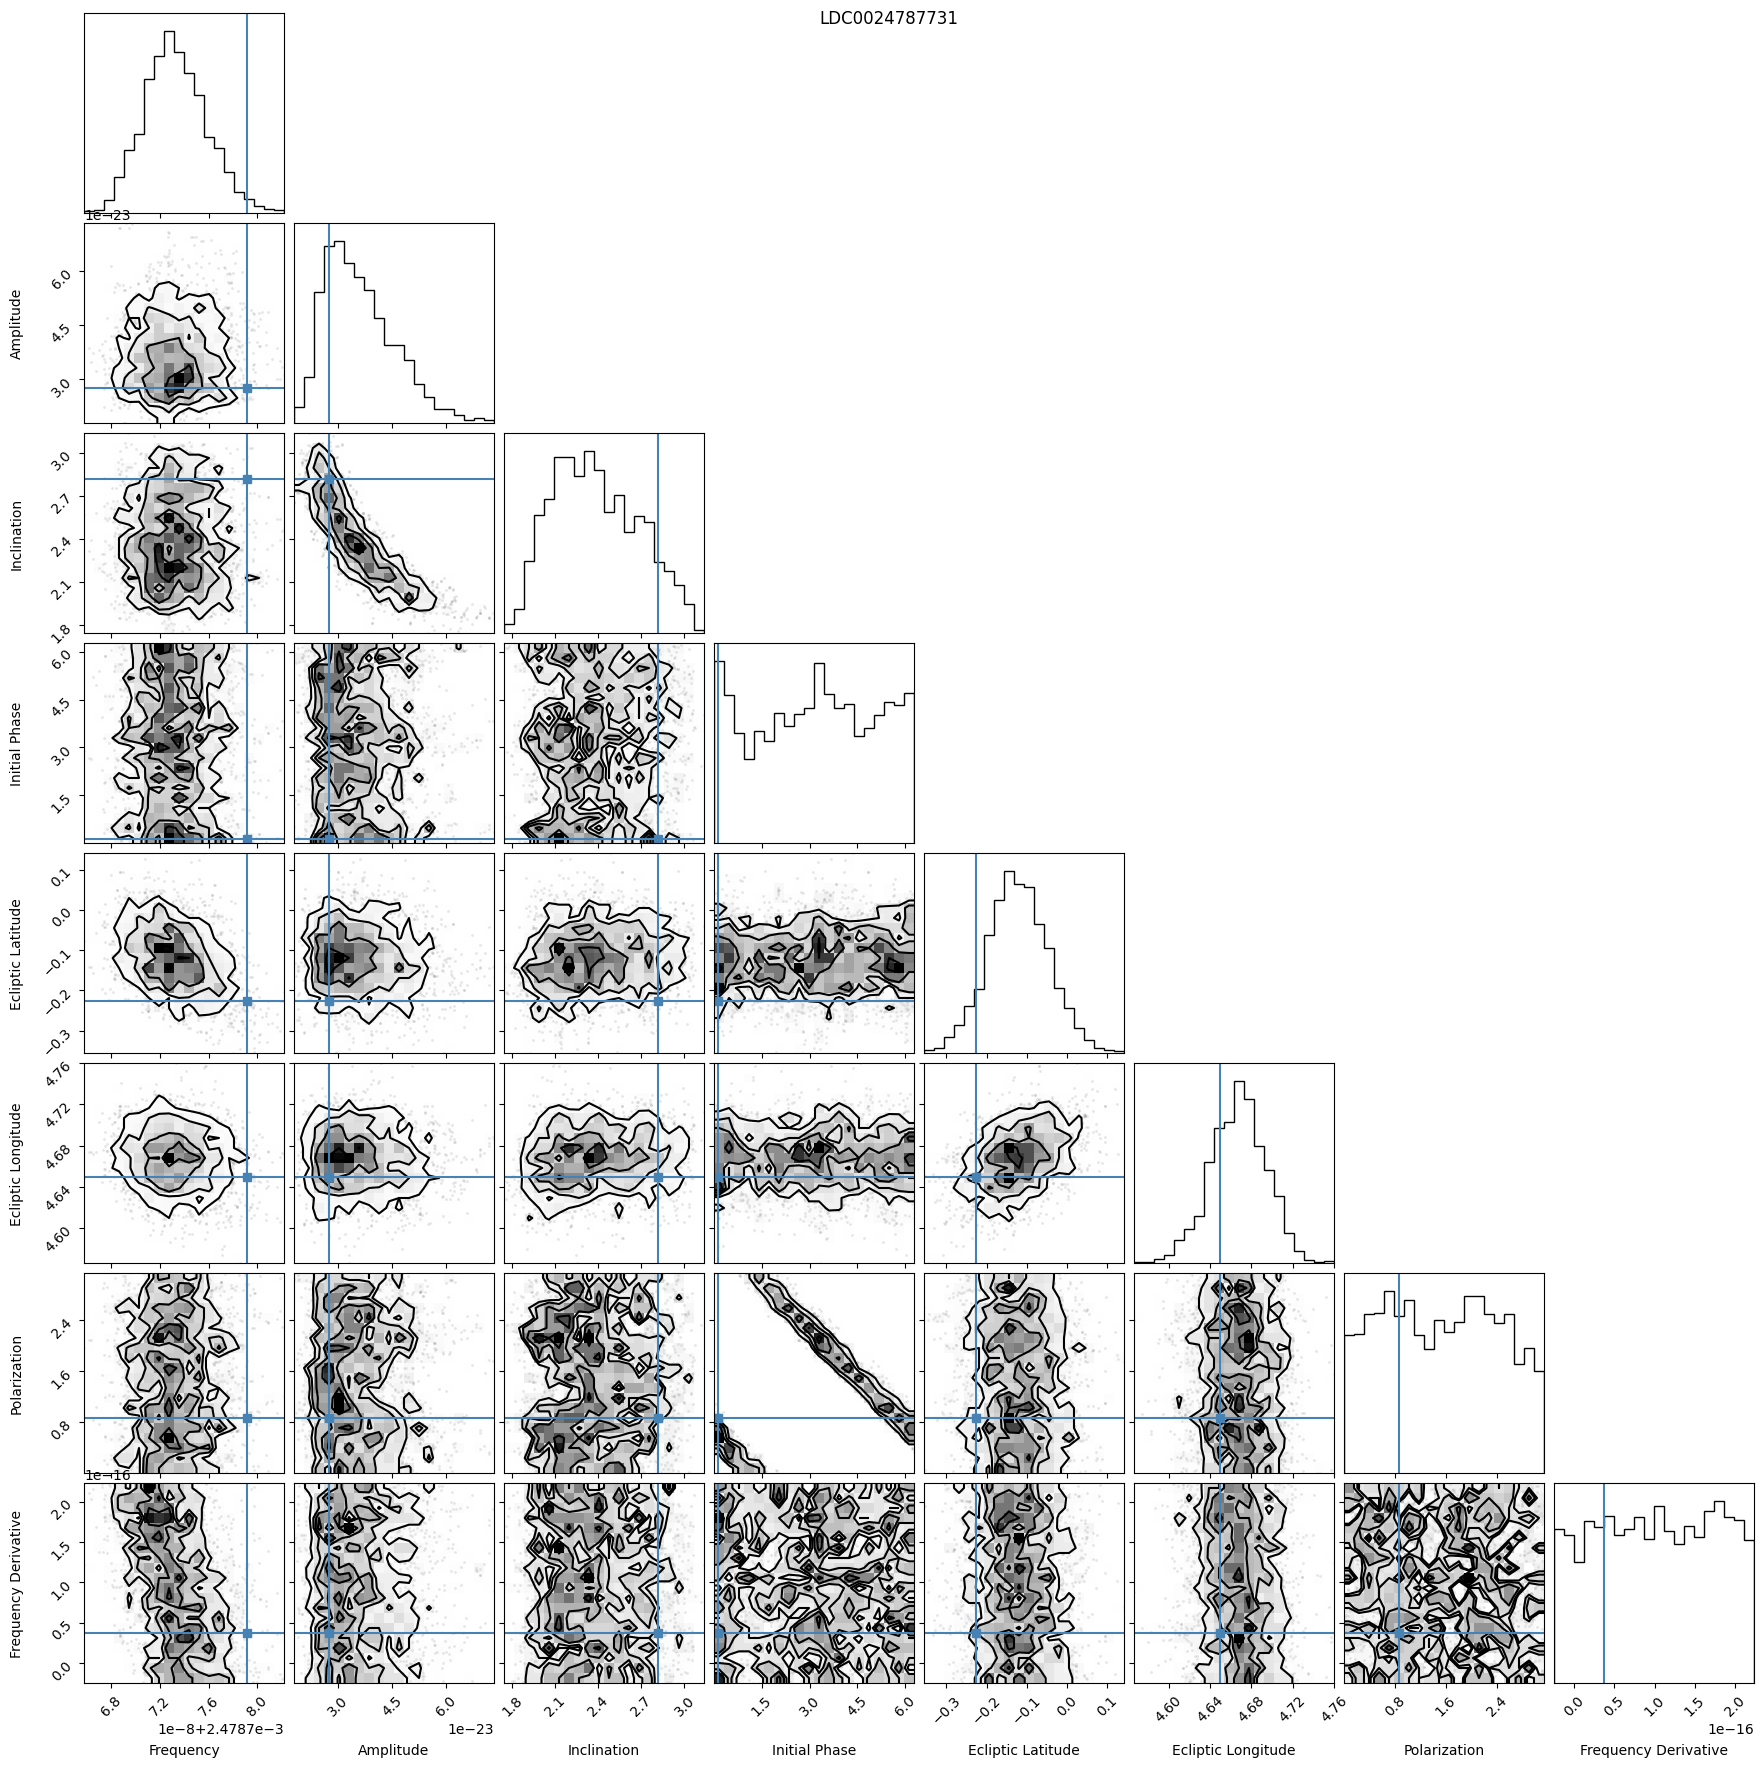

In [70]:
plot_bad_hdrs(bad_hdr_index=45, hdr_threshold=0.9, hdr_df=hdr_df)